# Redes Neurais: Multi-Layer Perceptron

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

## Modelo Redes Neurais Artificiais: Multi-Layer Perceptron

### Exemplo de Multiplicação:

In [ ]:
X1,X2,y = [],[],[]
for x1 in range(1,11):
  for x2 in range(1,101):
    result = x1*x2
    X1.append(x1)
    X2.append(x2)
    y.append(result)

tab_mult = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"y":y})
tab_mult.tail()

,X1,X2,y
995,10,96,960
996,10,97,970
997,10,98,980
998,10,99,990
999,10,100,1000


In [ ]:
X = tab_mult[['X1','X2']]

In [ ]:
# Crie o modelo sequencial
model = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model.add(tf.keras.layers.Dense(2, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model.add(tf.keras.layers.Dense(2, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

A Rede ficou com a seguinte arquitetura:


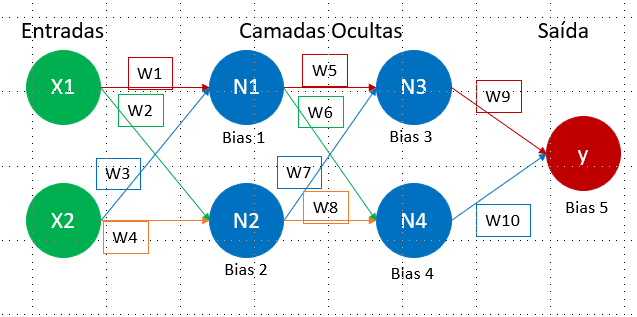

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 15 parâmetros:

> Na primeira camada, temos W1,W2,W3,W4 + Bias 1 do neurônio N1 + 1 Bias do neurônio N2: 6 parâmetros;

>> Na segunda camada, temos W5,W6,W7,W8 + Bias 3 do neurônio N3 + Bias 4 do neurônio N4: 6 parâmetros;

>>> Na terceira camada (camada de saída), temos W9,W10 + Bias 5 do neurônio que retorna a variável resposta: 3 parâmetros.

Portanto, 6 + 6 + 3 = 15 parâmetros.

In [ ]:
# Incluind early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history = model.fit(np.array([[X1[i],X2[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 1s 23ms/step - loss: 107261.7656
Epoch 2/2000
2/2 [==============================] - 0s 9ms/step - loss: 107003.2969
Epoch 3/2000
2/2 [==============================] - 0s 10ms/step - loss: 106746.2656
Epoch 4/2000
2/2 [==============================] - 0s 9ms/step - loss: 106477.1875
Epoch 5/2000
2/2 [==============================] - 0s 10ms/step - loss: 106221.5703
Epoch 6/2000
2/2 [==============================] - 0s 10ms/step - loss: 105954.7969
Epoch 7/2000
2/2 [==============================] - 0s 8ms/step - loss: 105688.7422
Epoch 8/2000
2/2 [==============================] - 0s 9ms/step - loss: 105424.5391
Epoch 9/2000
2/2 [==============================] - 0s 9ms/step - loss: 105150.4688
Epoch 10/2000
2/2 [==============================] - 0s 9ms/step - loss: 104881.0391
Epoch 11/2000
2/2 [==============================] - 0s 9ms/step - loss: 104608.2891
Epoch 12/2000
2/2 [==============================] - 0s 9ms/step - los

Teste Modelo 2

In [ ]:
# Crie o modelo sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(6, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(6, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(np.array([[X1[i],X2[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 1s 18ms/step - loss: 128403.4844
Epoch 2/2000
2/2 [==============================] - 0s 11ms/step - loss: 126987.8203
Epoch 3/2000
2/2 [==============================] - 0s 8ms/step - loss: 125596.5078
Epoch 4/2000
2/2 [==============================] - 0s 9ms/step - loss: 124161.6250
Epoch 5/2000
2/2 [==============================] - 0s 9ms/step - loss: 122812.6406
Epoch 6/2000
2/2 [==============================] - 0s 9ms/step - loss: 121429.8203
Epoch 7/2000
2/2 [==============================] - 0s 9ms/step - loss: 120067.5391
Epoch 8/2000
2/2 [==============================] - 0s 9ms/step - loss: 118735.5469
Epoch 9/2000
2/2 [==============================] - 0s 11ms/step - loss: 117373.3594
Epoch 10/2000
2/2 [==============================] - 0s 9ms/step - loss: 116054.4844
Epoch 11/2000
2/2 [==============================] - 0s 10ms/step - loss: 114741.3438
Epoch 12/2000
2/2 [==============================] - 0s 11ms/step - lo

Teste Modelo 3

In [ ]:
# Crie o modelo sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 16)                80        
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,813
Trainable params: 2,813
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(np.array([[X1[i],X2[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 1s 29ms/step - loss: 131135.9844
Epoch 2/2000
2/2 [==============================] - 0s 11ms/step - loss: 126089.8047
Epoch 3/2000
2/2 [==============================] - 0s 13ms/step - loss: 121198.7188
Epoch 4/2000
2/2 [==============================] - 0s 16ms/step - loss: 116139.8438
Epoch 5/2000
2/2 [==============================] - 0s 19ms/step - loss: 111331.9688
Epoch 6/2000
2/2 [==============================] - 0s 10ms/step - loss: 106279.2109
Epoch 7/2000
2/2 [==============================] - 0s 13ms/step - loss: 101153.5234
Epoch 8/2000
2/2 [==============================] - 0s 11ms/step - loss: 95971.5234
Epoch 9/2000
2/2 [==============================] - 0s 13ms/step - loss: 90484.5391
Epoch 10/2000
2/2 [==============================] - 0s 12ms/step - loss: 84996.9141
Epoch 11/2000
2/2 [==============================] - 0s 13ms/step - loss: 79333.6328
Epoch 12/2000
2/2 [==============================] - 0s 11ms/step -

Teste 4

In [ ]:
# Crie o modelo sequencial
model4 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model4.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(256, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model4.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model4.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 12        
                                                                 
 dense_12 (Dense)            (None, 16)                80        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
history4 = model4.fit(np.array([[X1[i],X2[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 2s 35ms/step - loss: 94880.8672
Epoch 2/2000
2/2 [==============================] - 0s 20ms/step - loss: 46877.2148
Epoch 3/2000
2/2 [==============================] - 0s 19ms/step - loss: 27981.6680
Epoch 4/2000
2/2 [==============================] - 0s 16ms/step - loss: 38646.1758
Epoch 5/2000
2/2 [==============================] - 0s 15ms/step - loss: 38747.8398
Epoch 6/2000
2/2 [==============================] - 0s 16ms/step - loss: 30143.0352
Epoch 7/2000
2/2 [==============================] - 0s 18ms/step - loss: 27290.3164
Epoch 8/2000
2/2 [==============================] - 0s 17ms/step - loss: 29903.3359
Epoch 9/2000
2/2 [==============================] - 0s 16ms/step - loss: 31796.5938
Epoch 10/2000
2/2 [==============================] - 0s 17ms/step - loss: 30838.1680
Epoch 11/2000
2/2 [==============================] - 0s 20ms/step - loss: 28305.5234
Epoch 12/2000
2/2 [==============================] - 0s 21ms/step - loss: 

Teste 5

In [ ]:
# Crie o modelo sequencial
model5 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model5.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model5.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model5.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 12        
                                                                 
 dense_19 (Dense)            (None, 16)                80        
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dense_24 (Dense)            (None, 64)               

In [ ]:
history5 = model5.fit(np.array([[X1[i],X2[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Teste 6

Learning Rate Decrescente

In [ ]:
# Crie o modelo sequencial
model6 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model6.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(16, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model6.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 12        
                                                                 
 dense_31 (Dense)            (None, 16)                80        
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dense_33 (Dense)            (None, 32)                544       
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 64)               

In [ ]:
history6 = model6.fit(np.array([[X1[i],X2[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 10s 59ms/step - loss: 128286.1562
Epoch 2/2000
2/2 [==============================] - 0s 47ms/step - loss: 120598.1953
Epoch 3/2000
2/2 [==============================] - 0s 41ms/step - loss: 105939.4219
Epoch 4/2000
2/2 [==============================] - 0s 63ms/step - loss: 79062.7188
Epoch 5/2000
2/2 [==============================] - 0s 69ms/step - loss: 46024.4883
Epoch 6/2000
2/2 [==============================] - 0s 54ms/step - loss: 34548.3594
Epoch 7/2000
2/2 [==============================] - 0s 70ms/step - loss: 48321.5508
Epoch 8/2000
2/2 [==============================] - 0s 51ms/step - loss: 32227.2070
Epoch 9/2000
2/2 [==============================] - 0s 85ms/step - loss: 30388.4531
Epoch 10/2000
2/2 [==============================] - 0s 41ms/step - loss: 34838.6953
Epoch 11/2000
2/2 [==============================] - 0s 35ms/step - loss: 34289.7031
Epoch 12/2000
2/2 [==============================] - 0s 43ms/step - lo

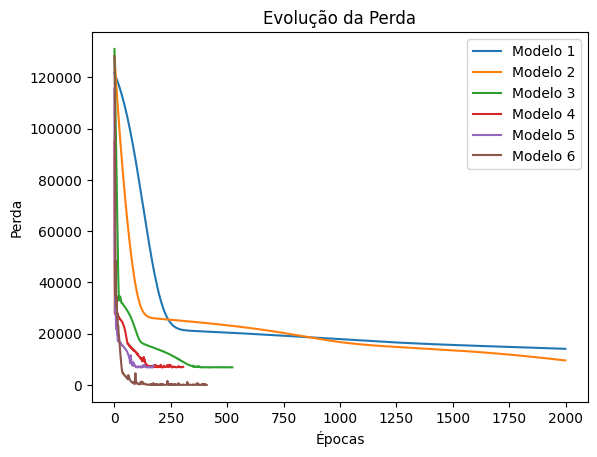

In [ ]:
# Extrai os valores da perda de cada histórico de treinamento
loss_values1 = history.history['loss']
loss_values2 = history2.history['loss']
loss_values3 = history3.history['loss']
loss_values4 = history4.history['loss']
loss_values5 = history5.history['loss']
loss_values6 = history6.history['loss']

# Cria um gráfico com a evolução da perda ao longo das épocas para cada histórico
plt.plot(loss_values1, label='Modelo 1')
plt.plot(loss_values2, label='Modelo 2')
plt.plot(loss_values3, label='Modelo 3')
plt.plot(loss_values4, label='Modelo 4')
plt.plot(loss_values5, label='Modelo 5')
plt.plot(loss_values6, label='Modelo 6')

plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()  # Adiciona uma legenda com os rótulos dos históricos
plt.show()

Conclusão

Percebemos que:

1. Aumentar a complexidade da rede neural (aumentar a quantidade de camadas e neurônios) fez com que o erro (perda) diminuísse, conforme aumentamos a complexidade. Entretanto, chegou num ponto no qual todos os modelos mantinham uma loss em torno de 6.000.

2. Alterar as funções de ativação é um dos ganhos para realmente diferenciar uma rede neural de uma regressão linear (simples ou múltipla). No modelo 6, mantivemos alguns neurônios com a função de ativação linear e outros com ReLU. O modelo deixou de ser linear e foi possível alcançar um resultado coerente.

## Exercicio

Considere a tabela abaixo.

Quando x3 for == 1, é realizada uma operação de multiplicação. Quando x3 == 2, é realizada uma soma.

Crie uma rede neural que receba como parâmetro X1, X2 e X3 e tenha como saída y. A rede deverá ser multi-layer perceptron.

Gere o gráfico de perda e calcule o erro do modelo. Faça testes para avaliar se a rede é capaz de acertar quanto os valores de x1 e x2 forem maiores que 100.

In [ ]:
X1,X2,X3,y = [],[],[],[]
for x1 in range(1,101):
  for x2 in range(1,101):
    for x3 in range(1,3):
      if x3 == 1:
        result = x1*x2
      else:
        result = x1+x2
      X1.append(x1)
      X2.append(x2)
      X3.append(x3)
      y.append(result)

tab_mult_soma = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"X3":X3,"y":y})
tab_mult_soma.tail()

,X1,X2,X3,y
19995,100,98,2,198
19996,100,99,1,9900
19997,100,99,2,199
19998,100,100,1,10000
19999,100,100,2,200


In [ ]:
X = tab_mult_soma[['X1','X2', 'X3']]

# Crie o modelo sequencial
model_exemplo1 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model_exemplo1.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],)))

model_exemplo1.add(tf.keras.layers.Dense(16, activation='linear'))

model_exemplo1.add(tf.keras.layers.Dense(16, activation='relu'))

model_exemplo1.add(tf.keras.layers.Dense(32, activation='linear'))

model_exemplo1.add(tf.keras.layers.Dense(32, activation='relu'))

model_exemplo1.add(tf.keras.layers.Dense(64, activation='linear'))

model_exemplo1.add(tf.keras.layers.Dense(64, activation='relu'))

model_exemplo1.add(tf.keras.layers.Dense(128, activation='linear'))

model_exemplo1.add(tf.keras.layers.Dense(128, activation='relu'))

model_exemplo1.add(tf.keras.layers.Dense(256, activation='linear'))

model_exemplo1.add(tf.keras.layers.Dense(256, activation='relu'))

model_exemplo1.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model_exemplo1.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
model_exemplo1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 16        
                                                                 
 dense_7 (Dense)             (None, 16)                80        
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 64)               

In [ ]:
# Incluind early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

In [ ]:
history_exemplo = model_exemplo1.fit(
    np.array([[X1[i], X2[i], X3[i]] for i in range(0,len(X))]),
    np.array(y), epochs=300, batch_size=int(0.50*len(X)), verbose=1,
    callbacks=[early_stopping_callback]
)

Epoch 1/300
2/2 [==============================] - 3s 388ms/step - loss: 5710030.5000
Epoch 2/300
2/2 [==============================] - 1s 315ms/step - loss: 5564261.0000
Epoch 3/300
2/2 [==============================] - 1s 296ms/step - loss: 5315311.0000
Epoch 4/300
2/2 [==============================] - 1s 343ms/step - loss: 4869112.0000
Epoch 5/300
2/2 [==============================] - 1s 308ms/step - loss: 4191010.0000
Epoch 6/300
2/2 [==============================] - 0s 181ms/step - loss: 3407805.7500
Epoch 7/300
2/2 [==============================] - 0s 201ms/step - loss: 3360124.0000
Epoch 8/300
2/2 [==============================] - 0s 189ms/step - loss: 3614044.5000
Epoch 9/300
2/2 [==============================] - 0s 220ms/step - loss: 3229150.2500
Epoch 10/300
2/2 [==============================] - 0s 184ms/step - loss: 3182245.7500
Epoch 11/300
2/2 [==============================] - 0s 187ms/step - loss: 3308372.7500
Epoch 12/300
2/2 [==============================] - 

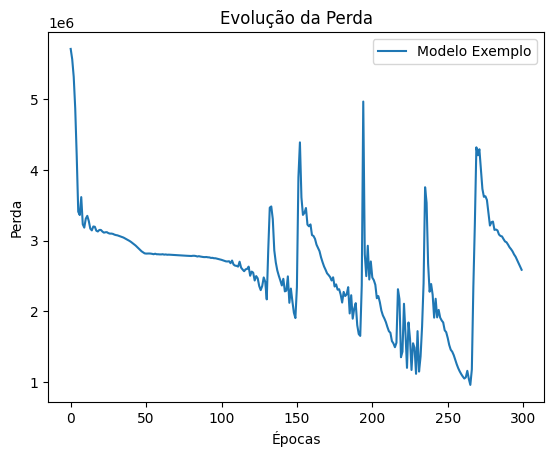

In [ ]:
loss_values_exemplo = history_exemplo.history['loss']

plt.plot(loss_values_exemplo, label='Modelo Exemplo')

plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()  # Adiciona uma legenda com os rótulos dos históricos
plt.show()

In [ ]:
y_pred = model_exemplo1.predict(np.array([[X1[i],X2[i],X3[i]] for i in range(0,20000)])).flatten()
tab_mult_soma['Predito'] = y_pred
tab_mult_soma.tail(50)

625/625 [==============================] - 1s 2ms/step


,X1,X2,X3,y,Predito
19950,100,76,1,7600,2981.613281
19951,100,76,2,176,2713.528320
19952,100,77,1,7700,3006.964355
19953,100,77,2,177,2738.878174
19954,100,78,1,7800,3032.305176
19955,100,78,2,178,2764.227539
19956,100,79,1,7900,3057.651855
19957,100,79,2,179,2789.568359
19958,100,80,1,8000,3082.996826
19959,100,80,2,180,2814.914307


## Treinando de outra forma

In [ ]:
model_exemplo_V2 = tf.keras.models.Sequential()

model_exemplo_V2.add(tf.keras.layers.Dense(2, activation='linear', input_shape=(X.shape[1],)))

model_exemplo_V2.add(tf.keras.layers.Dense(2, activation='linear'))

model_exemplo_V2.add(tf.keras.layers.Dense(1, activation='linear'))

model_exemplo_V2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history_exemplo_V2 = model_exemplo_V2.fit(
    np.array([[X1[i], X2[i], X3[i]] for i in range(0,len(X))]),
    np.array(y), epochs=2000, batch_size=int(0.70*len(X)), verbose=1,
    callbacks=[early_stopping_callback]
)

Epoch 1/2000
2/2 [==============================] - 1s 22ms/step - loss: 5782208.0000
Epoch 2/2000
2/2 [==============================] - 0s 13ms/step - loss: 5780166.0000
Epoch 3/2000
2/2 [==============================] - 0s 13ms/step - loss: 5778135.5000
Epoch 4/2000
2/2 [==============================] - 0s 13ms/step - loss: 5776112.0000
Epoch 5/2000
2/2 [==============================] - 0s 13ms/step - loss: 5774097.5000
Epoch 6/2000
2/2 [==============================] - 0s 14ms/step - loss: 5772082.0000
Epoch 7/2000
2/2 [==============================] - 0s 14ms/step - loss: 5770093.5000
Epoch 8/2000
2/2 [==============================] - 0s 14ms/step - loss: 5768092.0000
Epoch 9/2000
2/2 [==============================] - 0s 16ms/step - loss: 5766100.0000
Epoch 10/2000
2/2 [==============================] - 0s 16ms/step - loss: 5764121.5000
Epoch 11/2000
2/2 [==============================] - 0s 17ms/step - loss: 5762149.5000
Epoch 12/2000
2/2 [==============================] -

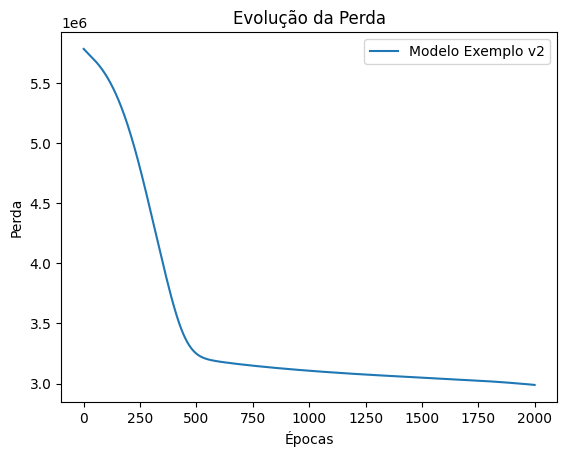

In [ ]:
loss_values_exemplo = history_exemplo_V2.history['loss']

plt.plot(loss_values_exemplo, label='Modelo Exemplo v2')

plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [ ]:
# Crie o modelo sequencial
model_exemplo_v3 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model_exemplo_v3.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model_exemplo_v3.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model_exemplo_v3.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model_exemplo_v3.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model_exemplo_v3.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model_exemplo_v3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history_exemplo_V3 = model_exemplo_v3.fit(
    np.array([[X1[i], X2[i], X3[i]] for i in range(0,len(X))]),
    np.array(y), epochs=900, batch_size=int(0.80*len(X)), verbose=1,
    callbacks=[early_stopping_callback]
)

Epoch 1/900
2/2 [==============================] - 1s 18ms/step - loss: 5676820.0000
Epoch 2/900
2/2 [==============================] - 0s 13ms/step - loss: 5641656.0000
Epoch 3/900
2/2 [==============================] - 0s 14ms/step - loss: 5606121.0000
Epoch 4/900
2/2 [==============================] - 0s 13ms/step - loss: 5569875.0000
Epoch 5/900
2/2 [==============================] - 0s 20ms/step - loss: 5532641.5000
Epoch 6/900
2/2 [==============================] - 0s 13ms/step - loss: 5493943.0000
Epoch 7/900
2/2 [==============================] - 0s 16ms/step - loss: 5453993.5000
Epoch 8/900
2/2 [==============================] - 0s 15ms/step - loss: 5411775.5000
Epoch 9/900
2/2 [==============================] - 0s 13ms/step - loss: 5367283.5000
Epoch 10/900
2/2 [==============================] - 0s 14ms/step - loss: 5320430.0000
Epoch 11/900
2/2 [==============================] - 0s 18ms/step - loss: 5270558.5000
Epoch 12/900
2/2 [==============================] - 0s 13ms/ste

In [ ]:
model_exemplo_v4 = tf.keras.models.Sequential()

model_exemplo_v4.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],)))

model_exemplo_v4.add(tf.keras.layers.Dense(16, activation='linear'))

model_exemplo_v4.add(tf.keras.layers.Dense(32, activation='linear'))

model_exemplo_v4.add(tf.keras.layers.Dense(64, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(128, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(256, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(128, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(64, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(32, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(16, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(8, activation='linear'))
model_exemplo_v4.add(tf.keras.layers.Dense(4, activation='linear'))

model_exemplo_v4.add(tf.keras.layers.Dense(1, activation='linear'))

model_exemplo_v4.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history_exemplo_V4 = model_exemplo_v4.fit(
    np.array([[X1[i], X2[i], X3[i]] for i in range(0,len(X))]),
    np.array(y), epochs=900, batch_size=int(0.80*len(X)), verbose=1,
    callbacks=[early_stopping_callback]
)

Epoch 1/900
2/2 [==============================] - 3s 76ms/step - loss: 5634653.5000
Epoch 2/900
2/2 [==============================] - 0s 62ms/step - loss: 5017517.5000
Epoch 3/900
2/2 [==============================] - 0s 66ms/step - loss: 4208600.5000
Epoch 4/900
2/2 [==============================] - 0s 68ms/step - loss: 3372931.0000
Epoch 5/900
2/2 [==============================] - 0s 56ms/step - loss: 3486302.5000
Epoch 6/900
2/2 [==============================] - 0s 55ms/step - loss: 3496972.2500
Epoch 7/900
2/2 [==============================] - 0s 62ms/step - loss: 3223203.7500
Epoch 8/900
2/2 [==============================] - 0s 62ms/step - loss: 3278651.7500
Epoch 9/900
2/2 [==============================] - 0s 56ms/step - loss: 3347366.0000
Epoch 10/900
2/2 [==============================] - 0s 55ms/step - loss: 3305359.7500
Epoch 11/900
2/2 [==============================] - 0s 51ms/step - loss: 3224116.7500
Epoch 12/900
2/2 [==============================] - 0s 61ms/ste

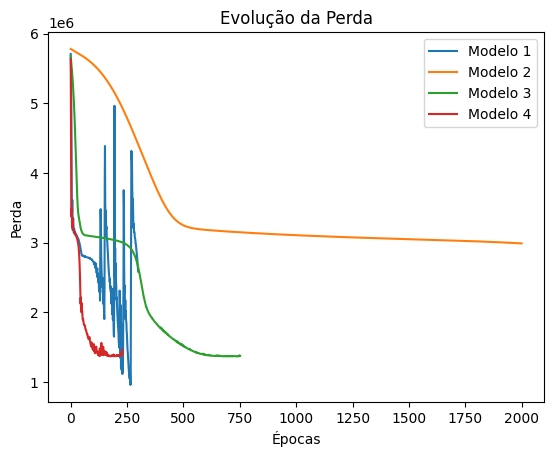

In [ ]:
# Extrai os valores da perda de cada histórico de treinamento
loss_values1 = history_exemplo.history['loss']
loss_values2 = history_exemplo_V2.history['loss']
loss_values3 = history_exemplo_V3.history['loss']
loss_values4 = history_exemplo_V4.history['loss']


# Cria um gráfico com a evolução da perda ao longo das épocas para cada histórico
plt.plot(loss_values1, label='Modelo 1')
plt.plot(loss_values2, label='Modelo 2')
plt.plot(loss_values3, label='Modelo 3')
plt.plot(loss_values4, label='Modelo 4')

plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()  # Adiciona uma legenda com os rótulos dos históricos
plt.show()

## Modelo 1

Primeiro modelo tem 12 camadas, sendo 11 ocultas e 1 saida. Seguimos o padráo de rede neural para
processar imagens, aonde cada camada tem a sequencia geometrica até 256. O modelo sai somente por um neuronio.
Treinamos com 300 epocas e batch_size com 50% dos dados.

Erro estava alto, > 2.586.176

## Modelo 2

Segundo modelo tem 3 camadas, sendo 2 ocultas e 1 saida. Primeira e segunda camada com 2 neuronios e a ultima
com 1. Treinamos com 2000 epocas e batch_size com 70% dos dados.

Erro estava alto, > 2.989.354

## Modelo 3

Terceiro modelo tem 5 camadas, sendo 4 ocultas e 1 saida. Treinamos com 900epocas e batch_size com 80% dos dados.
O callback EarlyStopping parou o treinamento antes de acabar.

Erro estava alto, > 1.374.777

## Modelo 4

Quarto modelo tem 13 camadas, sendo 12 ocultas e 1 saida.
Treinamos com 900 epocas e batch_size com 80% dos dados.
O callback EarlyStopping parou o treinamento antes de acabar.

Erro estava alto, > 1.464.185

**Em todos os 3 usamos o callback EarlyStopping com 50 epocas**

